<h1><center>Telecom Churn Case Study</center></h1>

### Business Prespective
For many incumbent operators, retaining high profitable customers is the number one business goal.<br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## PART 1 : Importing Libraries and Data Understanding

In [197]:
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [198]:
date_parsed = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
df=pd.read_csv('telecom_churn_data.csv',parse_dates=date_parsed)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [199]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [200]:
list(df.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [201]:
df.shape

(99999, 226)

There are a lot of rows , and columns. We will analyze in next part

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(179), int64(35), object(8)
memory usage: 172.4+ MB


## PART 2 : Data Preparation And Analysis

### Considering only High value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

As mentioned above, we need to predict churn only for the high-value customers. 
<br> $Define- high-value -customers -as- follows:$ Those who have recharged with an amount more than or equal to X, where X is the `70th percentile` of the average recharge amount in the first two months (the good phase).

'av_rech_amt_data_6','av_rech_amt_data_7'

In [203]:
a = df.filter(regex=(".*rech.*")).head()
a.filter(regex=(".*6.*")).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,4,362,252,2014-06-21,6/21/2014,1.0,252.0,0.0,1.0,252.0
1,4,74,44,2014-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2,5,168,86,2014-06-17,NaN,NaN,NaN,NaN,NaN,NaN
3,10,230,60,2014-06-28,NaN,NaN,NaN,NaN,NaN,NaN
4,5,196,56,2014-06-26,6/4/2014,1.0,56.0,1.0,0.0,56.0


In [204]:
df['good_phase_avg_recharge'] = ((df['total_rech_amt_6']/df['total_rech_num_6']) + (df['total_rech_amt_7']/df['total_rech_num_7']))/2
#first_month_avg_recharge_70p = df['av_rech_amt_data_6'].quantile(0.7)
#second_month_avg_recharge_70p = df['av_rech_amt_data_7'].quantile(0.7)

In [205]:
good_phase_avg_recharge = df['good_phase_avg_recharge'].quantile(0.7)

In [206]:
df = df[(df['good_phase_avg_recharge']>= good_phase_avg_recharge)]

In [207]:
len(df)

29044

Let see the columns corresponding to possible churners
### Possible Churn Customers <br>
 There could be 2 types of possible churners here

$Revenue-based churn:$ Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

$Usage-based churn:$ Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In this project, we will use the $Usage-based$ definition to define churn.

Approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

And also if we consider top 20% customers then customers falling under $Revenue-Based-Churn$ will automatically be irradicated

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.<br>
based on `[' *total_ic_mou_9* ',' *total_og_mou_9* ',' *vol_2g_mb_9* ',' *vol_3g_mb_9* ']`

In [208]:
churn_identifier_Columns = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_identifier_Columns].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.00
2,517.74,124.94,0.0,8.42
7,0.00,0.00,0.0,0.00
9,412.63,151.33,0.0,0.00
13,631.86,446.09,0.0,0.00


In [209]:
list_of_churners  = (df['total_ic_mou_9'] == 0.00) & (df['total_og_mou_9'] == 0.00) & (df['vol_2g_mb_9'] == 0.00) & (df['vol_3g_mb_9'] == 0.00)

In [210]:
df['churn'] = list_of_churners.astype(int)

Now we have created a list of churners<br>
Now lets remove the columns corresponding to 9th month which helped in identifying churners 

In [211]:
df.drop(churn_identifier_Columns,axis=1, inplace=True)

In [212]:
df.shape

(29044, 224)

### Creating Derived columns

Creating Derived columns from the existing columns using recharge dates

In [213]:
df['date_of_last_rech_6_day']=df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_7_day']=df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_8_day']=df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_9_day']=df['date_of_last_rech_9'].dt.day

Also creating columns on the basis of week of the year

In [214]:
df['last_recharge_week_6'] = df['date_of_last_rech_6'].dt.week
df['last_recharge_week_7'] = df['date_of_last_rech_7'].dt.week
df['last_recharge_week_8'] = df['date_of_last_rech_8'].dt.week
df['last_recharge_week_9'] = df['date_of_last_rech_9'].dt.week

We have derived week and day for the dates column <br>
We are not considering month as it will be represented by column itself.<br>
We are not considering Year also because it is same throughout.

For columns `['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']`, We are only considering Total number of days in that particular month. <br>


In [215]:
df['last_date_of_month_6'] = 30
df['last_date_of_month_7'] = 31
df['last_date_of_month_8'] = 31
df['last_date_of_month_9'] = 30

We have taken out many insights from column 'date_of_last_rech' ,Now will delete these columns

In [216]:
df.drop(date_parsed,axis=1,inplace=True)

### Removing All columns corresponding to '_9'

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [217]:
a = df.filter(regex=(".*_9.*")).head()
list_of_columns_corresponding_to_9 = list(a.columns)

In [218]:
df.drop(list_of_columns_corresponding_to_9,axis=1,inplace=True)

In [219]:
df.drop('sep_vbc_3g',axis=1,inplace=True)

### Missing Percentage and handling

In [220]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [221]:
missing_value_df.sort_values('percent_missing', ascending = False ,inplace=True)
missing_value_df

,column_name,percent_missing
max_rech_data_7,max_rech_data_7,64.880870
total_rech_data_7,total_rech_data_7,64.880870
av_rech_amt_data_7,av_rech_amt_data_7,64.880870
arpu_3g_7,arpu_3g_7,64.880870
date_of_last_rech_data_7,date_of_last_rech_data_7,64.880870
count_rech_2g_7,count_rech_2g_7,64.880870
arpu_2g_7,arpu_2g_7,64.880870
count_rech_3g_7,count_rech_3g_7,64.880870
night_pck_user_7,night_pck_user_7,64.880870
fb_user_7,fb_user_7,64.880870


There are a lot of columns having missing percent value more than 60% <br>
We will remove these columns straight away

In [222]:
columns_to_remove = list(missing_value_df[missing_value_df.percent_missing >60].index)

removing these columns from the dataframe

In [223]:
df.drop(columns_to_remove,axis=1,inplace=True)

In [224]:
df.shape

(29044, 146)

Assuming a fact that if customer is churned then the values of columns like "recharge, outgoing" which hve Nan values, will be zero

In [225]:
df[df.churn==1].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_avg_recharge,churn,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,last_recharge_week_6,last_recharge_week_7,last_recharge_week_8
0,7000842753,109,0.0,0.0,0.0,30,31,31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,87.250000,1,21,16,8.0,25,29,32.0
7,7000701601,109,0.0,0.0,0.0,30,31,31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.0,422.16,533.91,255.79,4.3,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.18,10.01,4.5,0.0,6.5,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,237.000000,1,27,25,26.0,26,30,35.0
35,7002108620,109,0.0,0.0,0.0,30,31,31,596.376,13.448,0.000,10.51,NaN,NaN,199.74,NaN,NaN,196.49,NaN,NaN,198.06,NaN,NaN,0.00,NaN,NaN,2.50,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,2.50,NaN,NaN,9.7,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,9.70,NaN,NaN,0.03,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,12.23,0.00,0.00,0.00,NaN,NaN,0.43,NaN,NaN,0.00,NaN,NaN,0.43,NaN,NaN,0.00,NaN,NaN,7.96,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,7.96,NaN,NaN,15.10,0.00,0.00,0.00,N

All the columns are either neumeric or date type, So it is highly likely that if there is a missing entry in these rows then it can be equal to zero.<br>
Taking the assumption that NAN values are zero

In [226]:
rows_fillna_0 = list(missing_value_df[(missing_value_df.percent_missing >0) & (missing_value_df.percent_missing <6)].index)

In [227]:
df.fillna(0,inplace=True)

### Distribution of Data

Let's see correlation and Distribution of the data<br>
Not using  Pairplot because of large number of features. Using heatmap instead 

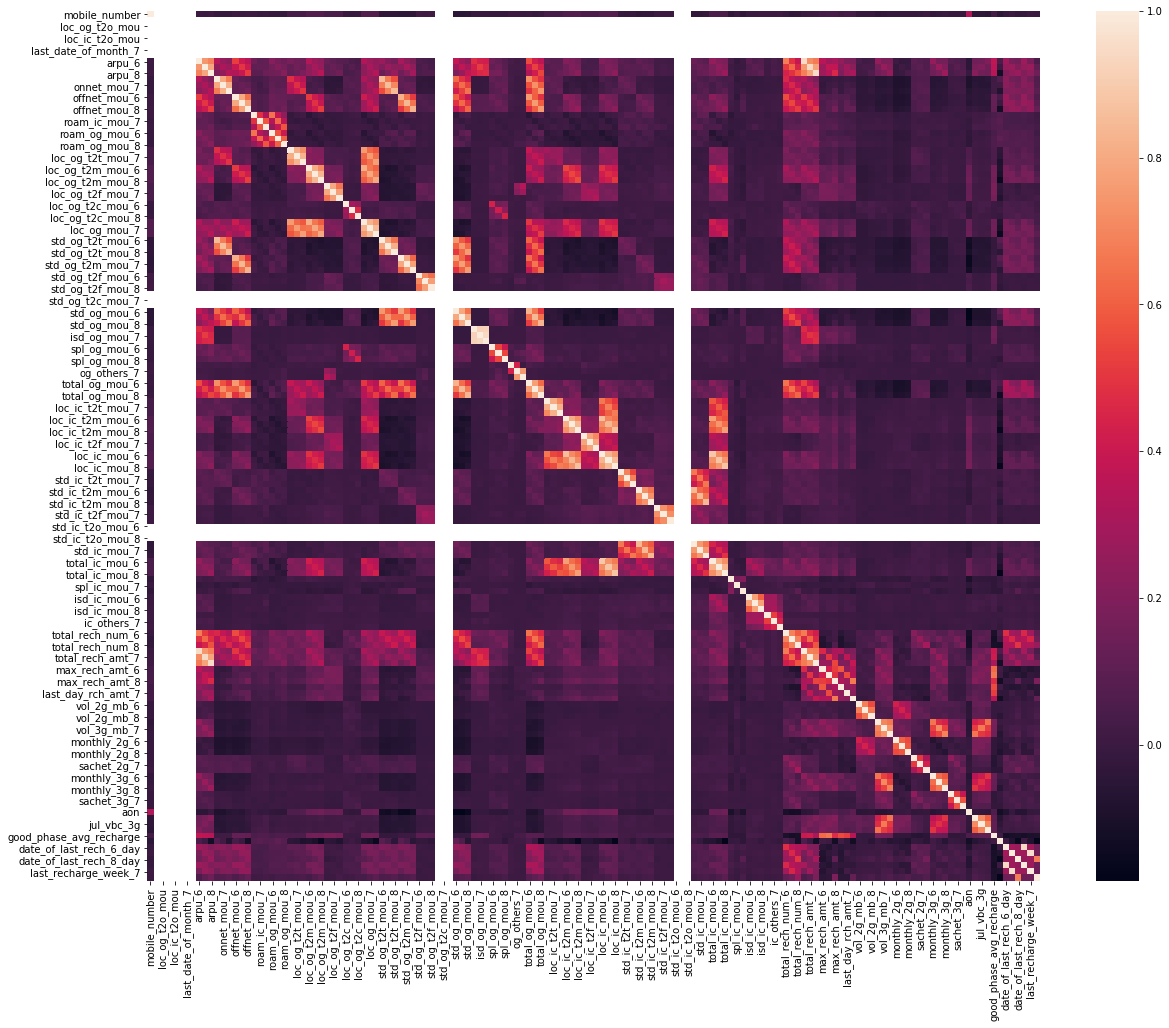

In [228]:
corr = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr)
plt.show()

Heatmap is difficult to comprehend due to large number of features, Let's see correlations Highest and lowest

In [229]:
min_max_corr = corr.unstack().sort_values()[::2]
min_max_corr[(min_max_corr>-1) & (min_max_corr<1)]

std_og_mou_7             aon                       -0.185411
aon                      std_og_mou_6              -0.181653
total_ic_mou_8           churn                     -0.176983
loc_ic_mou_8             churn                     -0.175946
last_recharge_week_8     churn                     -0.175236
churn                    loc_ic_t2m_mou_8          -0.163031
date_of_last_rech_8_day  churn                     -0.161336
std_og_mou_8             aon                       -0.155472
loc_og_mou_8             churn                     -0.155076
churn                    loc_og_t2m_mou_8          -0.153160
std_og_t2m_mou_7         aon                       -0.151152
std_og_t2m_mou_6         aon                       -0.149323
total_og_mou_8           churn                     -0.138336
aon                      std_og_t2t_mou_7          -0.132050
                         std_og_t2m_mou_8          -0.129665
max_rech_amt_8           churn                     -0.128060
churn                   

As we can see 'churn' and 'last_recharge_week_9' are highly negatively correlated with value approx -0.33<br>
And 'date_of_last_rech_7_day' and 'last_recharge_week_7' are highly positevly correlated with value approx 0.96

In [230]:
df['churn'].value_counts()

0    27008
1     2036
Name: churn, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC878992E8>],
      dtype=object)

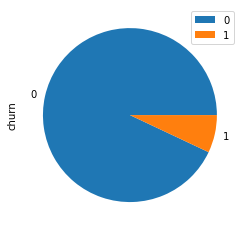

In [231]:
df[['churn']].apply(pd.value_counts).plot(kind='pie',subplots=True)

### Handling Class Imbalance

We can handle class imbalance either with Oversampling or with UnderSampling. Let's Initiall try this using Under Sampling<br>
We will be using undersampling as of now because of lack of computational resources

In [131]:
###Over sampling
'''
count_class_0, count_class_1 = df['churn'].value_counts()
dfa = df[df.churn==0]
dfb = df[df.churn==1]
df_class_0_under = dfb.sample(count_class_0,replace =True)
df_test_under = pd.concat([df_class_0_under, dfa], axis=0)
df =df_test_under
'''

"\ncount_class_0, count_class_1 = df['churn'].value_counts()\ndfa = df[df.churn==0]\ndfb = df[df.churn==1]\ndf_class_0_under = dfb.sample(count_class_0,replace =True)\ndf_test_under = pd.concat([df_class_0_under, dfa], axis=0)\ndf =df_test_under\n"

In [132]:
### Under sampling
count_class_0, count_class_1 = df['churn'].value_counts()
dfa = df[df['churn']==0]
dfb = df[df['churn']==1]
df_class_0_under = dfa.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, dfb], axis=0)
df =df_test_under

### Train_Test_split

Since our churn values are very less, therfore we will use stratify. It will be used so as to equally distribute churn variable in Train and test dataset  

In [133]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, stratify= df['churn'] )

In [134]:
df_train['churn'].value_counts()

1    1425
0    1425
Name: churn, dtype: int64

In [135]:
df_test['churn'].value_counts()

1    611
0    611
Name: churn, dtype: int64

So we have equally distributed the values

### Scalling Variables

Since we will be using PCA , therefore we will be scalling variables to get good components for churn prediction 

In [136]:
col_list = list(df_train.columns)
col_list.remove('churn')
col_list.remove('mobile_number')


Now, Transforming all the variables of df_train

In [137]:
scaler = MinMaxScaler()
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [138]:
df_train.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_avg_recharge,churn,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,last_recharge_week_6,last_recharge_week_7,last_recharge_week_8
94593,7001661962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038820,0.040449,0.021460,0.046307,0.006228,0.004482,0.012195,0.040350,0.022352,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001557,0.003540,0.009797,0.018538,0.013491,0.007806,0.002394,0.008952,0.021799,0.000000,0.000000,0.0,0.018549,0.017990,0.012892,0.045685,0.004781,0.00000,0.003495,0.027571,0.022739,0.00000,0.0,0.0,0.0,0.0,0.0,0.041301,0.026045,0.012762,0.0,0.000000,0.0,0.000000,0.026846,0.000000,0.000000,0.0,0.0,0.050262,0.037005,0.024152,0.001489,0.002304,0.005868,0.037793,0.023602,0.026320,0.027352,0.007162,0.022203,0.035709,0.020242,0.036550,0.005143,0.015840,0.000000,0.021135,0.029837,0.017540,0.000000,0.000000,0.0,0.0,0.0,0.0,0.026088,0.035985,0.017303,0.059853,0.060212,0.035499,0.171348,0.0,0.136437,0.007548,0.016430,0.030860,0.000873,0.008420,0.0,0.092593,0.038462,0.069767,0.048167,0.009951,0.029268,0.043641,0.057620,0.041935,0.043641,0.057620,0.041935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.864723,0.0,0.0,0.0,0.028196,0,0.965517,0.766667,0.935484,0.8,0.75,1.000000
59618,7000086072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045096,0.039297,0.010054,0.015488,0.008371,0.001846,0.074869,0.055223,0.000854,0.0,0.000752,0.001169,0.0,0.002767,0.002612,0.000800,0.000211,0.000000,0.013953,0.002256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.013030,0.002351,0.000000,0.015140,0.007419,0.00000,0.068869,0.053603,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.080450,0.048763,0.000000,0.0,0.000000,0.0,0.002282,0.005060,0.000000,0.083944,0.0,0.0,0.086930,0.049554,0.000000,0.013286,0.000000,0.000000,0.026286,0.003393,0.000000,0.000000,0.000000,0.000000,0.030421,0.002336,0.000000,0.007899,0.001046,0.000000,0.005293,0.000023,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.012897,0.000908,0.000000,0.040314,0.002882,0.000000,

In [139]:
df_train.shape

(2850, 146)

let's also transform the Test dataset

In [140]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [141]:
df_test.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,good_phase_avg_recharge,churn,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,last_recharge_week_6,last_recharge_week_7,last_recharge_week_8
89234,7001475800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038739,0.034578,0.039738,0.023032,0.018934,0.039169,0.013484,0.016833,0.029431,0.0,0.0,0.00000,0.0,0.0,0.000000,0.018711,0.020571,0.038228,0.005941,0.005280,0.005484,0.000532,0.002541,0.003107,0.000000,0.000000,0.0,0.020905,0.020603,0.021575,0.013769,0.010480,0.022002,0.010792,0.011724,0.042011,0.0,0.0,0.000000,0.0,0.0,0.0,0.022049,0.019500,0.045528,0.000000,0.000000,0.000000,0.000000,0.015474,0.0,0.0,0.0,0.0,0.032308,0.031522,0.062306,0.011741,0.014811,0.023222,0.037749,0.011913,0.024149,0.006391,0.000965,0.002587,0.039411,0.019087,0.043426,0.001184,0.000000,0.005638,0.005507,0.002434,0.001091,0.001671,0.001501,0.000943,0.0,0.0,0.0,0.006912,0.002220,0.003986,0.058668,0.035907,0.027986,0.000000,0.0,0.056180,0.028389,0.021562,0.034280,0.007882,0.002963,0.022181,0.074074,0.076923,0.139535,0.030583,0.013248,0.025732,0.037504,0.043641,0.046452,0.037504,0.000000,0.021613,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384903,0.0,0.0,0.000000,0.004364,0,0.724138,1.000000,0.806452,0.6,1.00,1.0
47967,7001767265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078628,0.073388,0.116872,0.014567,0.018370,0.016666,0.137839,0.110111,0.125724,0.0,0.0,0.00000,0.0,0.0,0.000000,0.029282,0.042106,0.036427,0.233779,0.107497,0.095978,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.231381,0.135076,0.101691,0.000000,0.001008,0.000000,0.032843,0.033073,0.056416,0.0,0.0,0.000000,0.0,0.0,0.0,0.032382,0.026527,0.031663,0.000000,0.000000,0.000000,0.008488,0.000000,0.0,0.0,0.0,0.0,0.147825,0.102332,0.128020,0.022507,0.041611,0.037285,0.189170,0.198816,0.198446,0.000000,0.000000,0.000000,0.164399,0.166584,0.219250,0.000000,0.000356,0.000000,0.009888,0.025713,0.010492,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.009888,0.019752,0.010350,0.171136,0.170595,0

In [142]:
df_test.shape

(1222, 146)

### Applying PCA

Since now our dataset is almost set. We need to apply PCA so as to reduce the number of features

In [143]:
y_train_labels= df_train.pop('mobile_number')
y_train = df_train.pop('churn')
X_train = df_train
pca = PCA(svd_solver='randomized', random_state=0)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=False)

In [144]:
y_test_labels = df_test.pop('mobile_number')
y_test = df_test.pop('churn')
X_test = df_test

In [145]:
pca.components_

array([[ 9.17577183e-17, -2.22044605e-16,  2.77555756e-17, ...,
        -1.92227050e-01, -3.88317633e-01, -4.35410408e-01],
       [-4.14508251e-17, -2.77555756e-16, -1.11022302e-16, ...,
         2.99930147e-01,  2.53595524e-01, -4.90893049e-01],
       [ 1.58712471e-17,  1.24900090e-16, -1.11022302e-16, ...,
        -1.72640840e-01, -2.90888409e-02,  2.56868224e-03],
       ...,
       [-0.00000000e+00, -2.73162231e-01, -4.20710191e-01, ...,
         1.40512602e-16,  1.24900090e-16, -0.00000000e+00],
       [ 0.00000000e+00,  2.17227638e-01, -4.32239330e-01, ...,
         8.32667268e-17, -1.05818132e-16, -2.77555756e-17],
       [-1.00000000e+00,  2.61755744e-22, -4.00698871e-22, ...,
         6.09046561e-16,  7.58859334e-16, -1.49495323e-16]])

In [146]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X_train.columns})
pcs_df.head()

,PC1,PC2,Feature
0,9.175772e-17,-4.145083e-17,circle_id
1,-2.220446e-16,-2.775558e-16,loc_og_t2o_mou
2,2.775558e-17,-1.110223e-16,std_og_t2o_mou
3,3.469447e-18,1.110223e-16,loc_ic_t2o_mou
4,-4.336809e-19,2.775558e-17,last_date_of_month_6


In [147]:
pcs_df

,PC1,PC2,Feature
0,9.175772e-17,-4.145083e-17,circle_id
1,-2.220446e-16,-2.775558e-16,loc_og_t2o_mou
2,2.775558e-17,-1.110223e-16,std_og_t2o_mou
3,3.469447e-18,1.110223e-16,loc_ic_t2o_mou
4,-4.336809e-19,2.775558e-17,last_date_of_month_6
5,-2.710505e-20,-1.040834e-17,last_date_of_month_7
6,8.470329e-22,2.168404e-19,last_date_of_month_8
7,-1.952625e-02,4.917062e-02,arpu_6
8,-3.150517e-02,3.216154e-02,arpu_7
9,-6.581047e-02,2.211520e-02,arpu_8


The above table shows all the principal components. For better Reference we will take a look at first 2 principal components for the columns



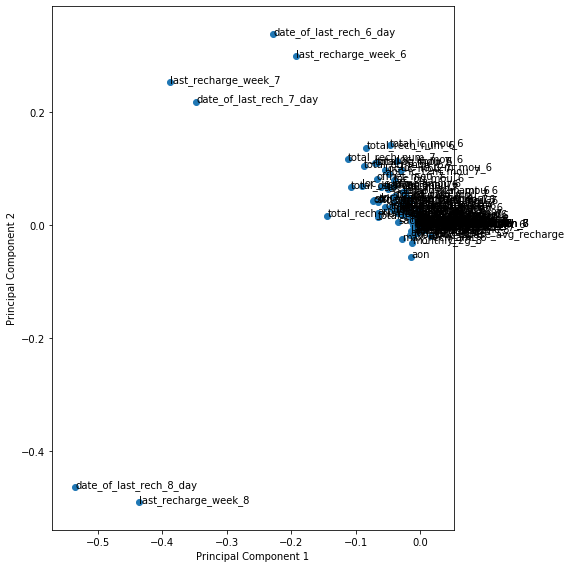

In [148]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

As we can see columns (last_recharge_week), (date_of_last_recharge) and (aon) are having more influence for all the months

Looking at the screeplot to assess the number of needed principal components

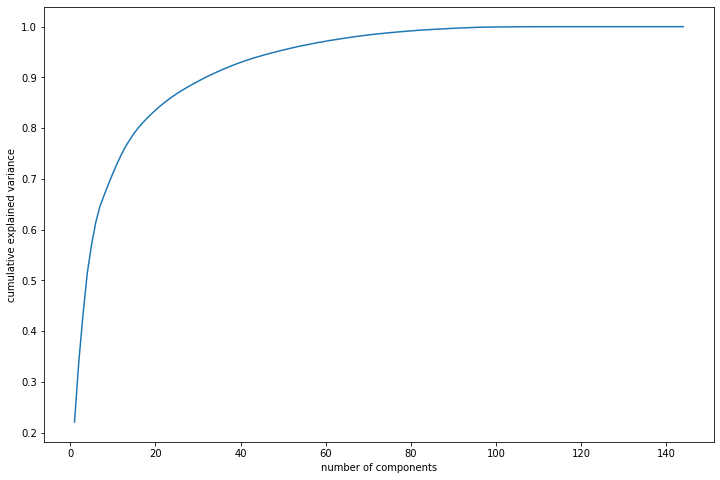

In [149]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(range(1,len(df_train.columns)+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see from the scree plot above , at around 50 variables we are able to explain 95 % variance of the data

Therefore we will take 50 components to create the model

In [150]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

pca_final = IncrementalPCA(n_components=50)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(2850, 50)

So lets see the correlation heatmap of the components

In [151]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.019376051387734867 , min corr:  -0.015636758500303168


Applying PCA to test data as well

In [152]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(1222, 50)

## PART : 3 Modeling

### Model -- 1 : Logistic Regression with L2 Regularization

### `Modelling Logistic Regression with default HyperParameters`

Assuming Presision and Recall are both important in this case so we are taking F1 SCore as a way to find better model

In [153]:
lrmodel = LogisticRegression(penalty='l2')
lrmodel.fit(X_train_pca,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now Predicting Test data set

In [154]:
test_pred = lrmodel.predict(X_test_pca)

Now lets measure the performance of the model with respect to y_test

In [155]:
accuracy_score = metrics.accuracy_score(y_test, test_pred)
precision_score = metrics.precision_score(y_test, test_pred)
recall_score = metrics.recall_score(y_test, test_pred)
f1_score = metrics.f1_score(y_test, test_pred)

# print(accuracy_score, precision_score, recall_score, f1_score)


# write the scores into the output file as a dictionary
# this code is already written for you
d = {'recall_score': recall_score,
    'f1_score': f1_score,
    'accuracy_score': accuracy_score,
	'precision_score': precision_score}
for key,val in d.items():
    print(key,'  :  ',val)


recall_score   :   0.8281505728314239
f1_score   :   0.8254486133768351
accuracy_score   :   0.8248772504091653
precision_score   :   0.8227642276422764


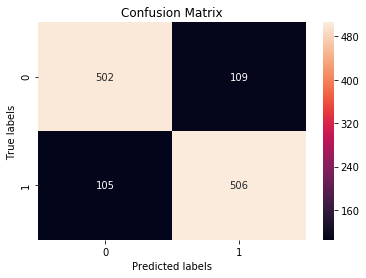

In [156]:
cm = metrics.confusion_matrix(y_test, test_pred)
ax= plt.subplot()
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(cm, annot=True, ax = ax,fmt="d",annot_kws=akws); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


### Tuning HuperParameters

In [157]:
# specify number of folds for k-fold CV
n_folds = 5


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid,scoring="f1",cv=n_folds)



clf.fit(X_train_pca,y_train)
# scores of GridSearch CV
scores = clf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008000,0.001096,0.001801,0.000400,0.001,{'C': 0.001},0.717391,0.719298,0.701627,0.758741,0.727928,0.724997,0.018888,7
1,0.010246,0.001543,0.001609,0.000479,0.01,{'C': 0.01},0.749117,0.734134,0.747795,0.788194,0.751773,0.754203,0.018061,6
2,0.017602,0.003444,0.002396,0.000493,0.1,{'C': 0.1},0.767361,0.780239,0.778157,0.804836,0.796522,0.785423,0.013461,5
3,0.021801,0.002038,0.001948,0.000183,1,{'C': 1},0.808950,0.808874,0.802792,0.831889,0.843911,0.819283,0.015827,4
4,0.028803,0.001475,0.002118,0.000219,10,{'C': 10},0.827939,0.804754,0.794376,0.840830,0.865979,0.826776,0.025575,3


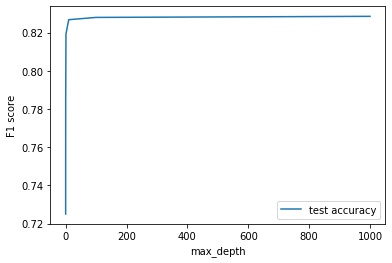

In [158]:
# plotting accuracies with max_depth
plt.figure()

plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.legend()
plt.show()

### Now let's see the performance of chosen Parameters

In [159]:
lr = LogisticRegression(penalty='l2',C=10)
lr.fit(X_train_pca,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
pred = lr.predict(X_test_pca)
# F1 score
metrics.f1_score(y_test, pred)

0.8416735028712059

### Since the above model is created using PCA , we will not see important features

### Model -- 2 : Decision tree classifier with AdaBoost

In [232]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [233]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [234]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict(X_test)
#predictions

In [235]:
# metrics: AUC
metrics.f1_score(y_test, predictions)

0.8741610738255033

In [237]:
metrics.precision_score(y_test, predictions)

0.8967297762478486

In [238]:
metrics.recall_score(y_test, predictions)

0.8527004909983633

### AdaBoost - Hyperparameter Tuning

Let's now tune the hyperparameters of the AdaBoost classifier. In this case, we have two types of hyperparameters - those of the component trees (max_depth etc.) and those of the ensemble (n_estimators, learning_rate etc.). 


We can tune both using the following technique - the keys of the form ```base_estimator_parameter_name``` belong to the trees (base estimator), and the rest belong to the ensemble.

In [165]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1)
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [166]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.198293,0.019482,0.057605,0.000432,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.840300,0.834225,0.860593,0.845039,0.011274,6,0.929862,0.927244,0.926724,0.927943,0.001373
1,10.409495,0.022675,0.112613,0.000855,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.845339,0.833689,0.862703,0.847243,0.011921,5,0.946316,0.944119,0.949495,0.946643,0.002207
2,15.664436,0.232844,0.163111,0.004974,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.843552,0.843116,0.867102,0.851257,0.011206,4,0.962304,0.975789,0.964456,0.967516,0.005916
3,11.451878,0.120494,0.061004,0.000816,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.864516,0.859275,0.861538,0.861777,0.002146,3,1.000000,1.000000,1.000000,1.000000,0.000000
4,23.042837,0.074259,0.150301,0.022525,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.872999,0.850325,0.863983,0.862436,0.009321,2,1.000000,1.000000,1.000000,1.000000,0.000000
5,35.480278,0.333652,0.190759,0.010449,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.867444,0.862955,0.861538,0.863979,0.002517,1,1.000000,1.000000,1.000000,1.000000,0.000000


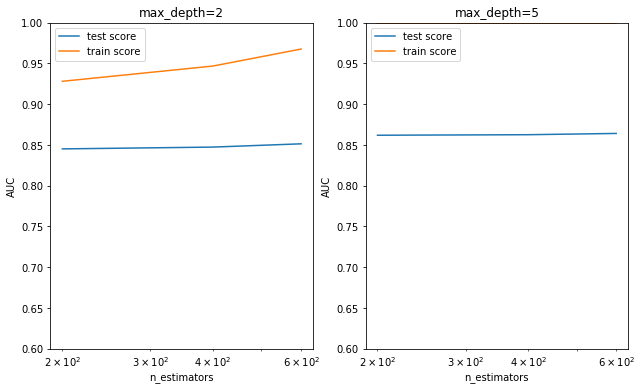

In [167]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


The results above show that:
- The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
- At max_depth=2, the model performs slightly better (approx 95% AUC) with a higher test score 

Thus, we should go ahead with ```max_depth=2``` and ```n_estimators=200```.

Note that we haven't experimented with many other important hyperparameters till now, such as ```learning rate```, ```subsample``` etc., and the results might be considerably improved by tuning them. We'll next experiment with these hyperparameters.

### Now let's see the performance of chosen Parameters

In [168]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [169]:
# predict on test data
predictions = ABC.predict(X_test)
#predictions[:10]

In [170]:
# roc auc
metrics.f1_score(y_test, predictions)

0.8663829787234044

In [171]:
# feature importance
importance = dict(zip(X_train.columns, ABC.feature_importances_))
importance
sorted_d = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('loc_ic_mou_8', 0.06076024253595755),
 ('last_day_rch_amt_8', 0.05669697004590882),
 ('total_ic_mou_8', 0.054003688722399634),
 ('spl_ic_mou_8', 0.046773388958910804),
 ('date_of_last_rech_8_day', 0.045695132876348195),
 ('loc_og_t2m_mou_8', 0.040302051670254864),
 ('arpu_8', 0.038917115261768186),
 ('roam_og_mou_7', 0.036735634757315026),
 ('std_og_t2t_mou_7', 0.030024821611544822),
 ('arpu_6', 0.028334667019996308),
 ('loc_og_mou_8', 0.02778105010498161),
 ('spl_og_mou_6', 0.027200002983107742),
 ('vol_2g_mb_8', 0.026788279361775254),
 ('total_rech_amt_6', 0.018937696450785888),
 ('loc_ic_mou_6', 0.018818573893661917),
 ('good_phase_avg_recharge', 0.017227449890136082),
 ('vol_3g_mb_8', 0.013754810021083865),
 ('loc_ic_t2m_mou_6', 0.013406352378635312),
 ('monthly_2g_7', 0.012295824019337712),
 ('isd_og_mou_7', 0.012219980696087042),
 ('arpu_7', 0.012191836529264907),
 ('loc_ic_t2m_mou_8', 0.011790590551238243),
 ('loc_og_t2f_mou_6', 0.011626314596007695),
 ('date_of_last_rech_6_da

### Model -- 3 : Random Forest classifier

### `Modelling random forest with default HyperParameters`

Assuming Presision and Recall are both important in this case so we are taking F1 SCore as a way to find better model

In [172]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
# Making predictions
predictions = rfc.predict(X_test)
# Let's check the report of our default model
metrics.f1_score(y_test, predictions)
#print(classification_report(y_test,predictions))

0.825817860300619

In [174]:
confusion_matrix(y_test,predictions)

array([[558,  53],
       [144, 467]], dtype=int64)

In [175]:
dict1 = {}
for feature,importance in zip(X_train.columns, rfc.feature_importances_):
    dict1[feature] = importance

sorted_d = sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('loc_og_mou_8', 0.10233526763786557),
 ('total_ic_mou_8', 0.07029883054878928),
 ('loc_ic_t2t_mou_8', 0.06320849097262772),
 ('roam_og_mou_8', 0.03849052694023389),
 ('max_rech_amt_8', 0.03463762171800209),
 ('last_day_rch_amt_8', 0.03076052361249899),
 ('offnet_mou_8', 0.03064519943442511),
 ('loc_og_t2m_mou_8', 0.027640451614381),
 ('std_og_mou_8', 0.021814918240379982),
 ('roam_ic_mou_8', 0.021417466789205874),
 ('std_ic_mou_8', 0.021057203894562955),
 ('loc_ic_t2m_mou_8', 0.019119433601402603),
 ('loc_ic_mou_7', 0.017924814597779337),
 ('total_og_mou_8', 0.014601927428569283),
 ('loc_ic_t2m_mou_7', 0.01351251391196564),
 ('date_of_last_rech_8_day', 0.012589734795156914),
 ('loc_og_t2t_mou_8', 0.012365193573139376),
 ('loc_ic_mou_8', 0.012228922401526137),
 ('loc_ic_t2t_mou_7', 0.01113145376240294),
 ('total_og_mou_7', 0.010482128562442319),
 ('std_og_mou_6', 0.009842486306074108),
 ('offnet_mou_7', 0.009748507242277327),
 ('total_ic_mou_6', 0.009509873700212636),
 ('arpu_7', 0.00

### Tuning HuperParameters

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [176]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,7,8],
    'min_samples_leaf': [20,30,40],
    'min_samples_split': [20,40,60],
    'n_estimators': [70,80,90], 
    'max_features': [20,30,40]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [177]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8519298245614035 using {'max_depth': 7, 'max_features': 40, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 70}


### Now let's see the performance of chosen Parameters

In [178]:
rf = RandomForestClassifier(max_depth=7,min_samples_leaf=30,min_samples_split=40,n_estimators=80,max_features=40)

In [179]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=40, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
# Making predictions
predictions = rf.predict(X_test)
# Let's check the report of our default model
metrics.f1_score(y_test, predictions)

0.8500428449014568

In [181]:
dict1 = {}
for feature,importance in zip(X_train.columns, rf.feature_importances_):
    dict1[feature] = importance

sorted_d = sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('loc_ic_mou_8', 0.17591245064844055),
 ('loc_ic_t2m_mou_8', 0.15579567200285013),
 ('total_ic_mou_8', 0.13423240747147494),
 ('roam_og_mou_8', 0.06281043803050304),
 ('loc_og_t2m_mou_8', 0.05847560941799872),
 ('loc_ic_t2t_mou_8', 0.04018867820968561),
 ('loc_og_mou_8', 0.039949796875146625),
 ('total_og_mou_8', 0.03963072957624299),
 ('last_day_rch_amt_8', 0.03674347359250902),
 ('roam_ic_mou_8', 0.02978428550729239),
 ('loc_og_t2t_mou_8', 0.02856741863422841),
 ('total_rech_amt_8', 0.016441542009734533),
 ('date_of_last_rech_8_day', 0.014165241613695076),
 ('loc_ic_t2f_mou_8', 0.014160927162486042),
 ('offnet_mou_8', 0.008868861538022483),
 ('std_og_mou_7', 0.008382842300868113),
 ('arpu_7', 0.00718609351758698),
 ('std_og_mou_6', 0.006941556140083923),
 ('std_ic_mou_8', 0.006553430238158976),
 ('vol_2g_mb_8', 0.006440062742725845),
 ('total_ic_mou_7', 0.0064211396703162575),
 ('loc_ic_t2m_mou_7', 0.005351329445411188),
 ('total_rech_amt_7', 0.004489249748625325),
 ('offnet_mou_7',

## PART : 4 Model Evaluation

### logistic regression with l2 
default parameters is 82.5%<br>
with hyperparameter tuning is 84%

### Decision Tree Classifier with Adaboost 
default parameters is 87.4%<br>
with hyperparameter tuning is 86.7%

### Random Forest classifier 
default parameters is 82.5%<br>
with hyperparameter tuning is 85%


### So our Final Model will be Decision Tree Classifier  with Adaboost

## 5 of the most Important Features  in our second model are

(`loc_ic_mou_8`', `0.06076024253595755`),<br>
 ('`last_day_rch_amt_8`', `0.05669697004590882`),<br>
 ('`total_ic_mou_8`', `0.054003688722399634`),<br>
 ('`spl_ic_mou_8`', `0.046773388958910804`),<br>
 (`'date_of_last_rech_8_day'`, `0.045695132876348195`),<br>
 
 